<a href="https://colab.research.google.com/github/wildanputra/deeplearningtutorial/blob/master/surface_defect_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Surface defect detection

sources inspiration:
https://towardsdatascience.com/deep-learning-computer-vision-and-automated-optical-inspection-774e8ca529d3

dataset : http://faculty.neu.edu.cn/yunhyan/NEU_surface_defect_database.html

in this case we will use 2 different method transfer learning for the classification, we will use pre-training & fine tuning with inception v3 model.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow version is  1.8.0


# Preprocessing
### Download data surface defect

In [0]:
#unzip the dataset
!unzip NEU-CLS-64.zip -d ./

Archive:  NEU-CLS-64.zip
   creating: ./NEU-CLS-64/
  inflating: ./NEU-CLS-64/.DS_Store  
   creating: ./__MACOSX/
   creating: ./__MACOSX/NEU-CLS-64/
  inflating: ./__MACOSX/NEU-CLS-64/._.DS_Store  
   creating: ./NEU-CLS-64/train/
   creating: ./NEU-CLS-64/train/sp/
  inflating: ./NEU-CLS-64/train/sp/189.jpg  
  inflating: ./NEU-CLS-64/train/sp/77.jpg  
  inflating: ./NEU-CLS-64/train/sp/162.jpg  
  inflating: ./NEU-CLS-64/train/sp/176.jpg  
  inflating: ./NEU-CLS-64/train/sp/88.jpg  
  inflating: ./NEU-CLS-64/train/sp/228.jpg  
  inflating: ./NEU-CLS-64/train/sp/214.jpg  
  inflating: ./NEU-CLS-64/train/sp/200.jpg  
  inflating: ./NEU-CLS-64/train/sp/201.jpg  
  inflating: ./NEU-CLS-64/train/sp/215.jpg  
  inflating: ./NEU-CLS-64/train/sp/229.jpg  
  inflating: ./NEU-CLS-64/train/sp/177.jpg  
  inflating: ./NEU-CLS-64/train/sp/89.jpg  
  inflating: ./NEU-CLS-64/train/sp/163.jpg  
  inflating: ./NEU-CLS-64/train/sp/188.jpg  
  inflating: ./NEU-CLS-64/train/sp/76.jpg  
  inflating: ./

  inflating: ./NEU-CLS-64/train/in/298.jpg  
  inflating: ./NEU-CLS-64/train/in/307.jpg  
  inflating: ./NEU-CLS-64/train/in/139.jpg  
  inflating: ./NEU-CLS-64/train/in/295.jpg  
  inflating: ./NEU-CLS-64/train/in/281.jpg  
  inflating: ./NEU-CLS-64/train/in/256.jpg  
  inflating: ./NEU-CLS-64/train/in/242.jpg  
  inflating: ./NEU-CLS-64/train/in/243.jpg  
  inflating: ./NEU-CLS-64/train/in/257.jpg  
  inflating: ./NEU-CLS-64/train/in/280.jpg  
  inflating: ./NEU-CLS-64/train/in/294.jpg  
  inflating: ./NEU-CLS-64/train/in/282.jpg  
  inflating: ./NEU-CLS-64/train/in/296.jpg  
  inflating: ./NEU-CLS-64/train/in/269.jpg  
  inflating: ./NEU-CLS-64/train/in/241.jpg  
  inflating: ./NEU-CLS-64/train/in/255.jpg  
  inflating: ./NEU-CLS-64/train/in/254.jpg  
  inflating: ./NEU-CLS-64/train/in/240.jpg  
  inflating: ./NEU-CLS-64/train/in/268.jpg  
  inflating: ./NEU-CLS-64/train/in/297.jpg  
  inflating: ./NEU-CLS-64/train/in/283.jpg  
  inflating: ./NEU-CLS-64/train/in/308.jpg  
  inflatin

  inflating: ./NEU-CLS-64/train/ps/696.jpg  
  inflating: ./NEU-CLS-64/train/ps/680.jpg  
  inflating: ./NEU-CLS-64/train/ps/694.jpg  
  inflating: ./NEU-CLS-64/train/ps/643.jpg  
  inflating: ./NEU-CLS-64/train/ps/657.jpg  
  inflating: ./NEU-CLS-64/train/ps/737.jpg  
  inflating: ./NEU-CLS-64/train/ps/723.jpg  
  inflating: ./NEU-CLS-64/train/ps/722.jpg  
  inflating: ./NEU-CLS-64/train/ps/736.jpg  
  inflating: ./NEU-CLS-64/train/ps/656.jpg  
  inflating: ./NEU-CLS-64/train/ps/642.jpg  
  inflating: ./NEU-CLS-64/train/ps/695.jpg  
  inflating: ./NEU-CLS-64/train/ps/681.jpg  
  inflating: ./NEU-CLS-64/train/ps/180.jpg  
  inflating: ./NEU-CLS-64/train/ps/143.jpg  
  inflating: ./NEU-CLS-64/train/ps/157.jpg  
  inflating: ./NEU-CLS-64/train/ps/751.jpg  
  inflating: ./NEU-CLS-64/train/ps/745.jpg  
  inflating: ./NEU-CLS-64/train/ps/744.jpg  
  inflating: ./NEU-CLS-64/train/ps/750.jpg  
  inflating: ./NEU-CLS-64/train/ps/156.jpg  
  inflating: ./NEU-CLS-64/train/ps/142.jpg  
  inflatin

  inflating: ./NEU-CLS-64/validation/cr/1014.jpg  
  inflating: ./NEU-CLS-64/validation/cr/1000.jpg  
   creating: ./NEU-CLS-64/validation/rs/
  inflating: ./NEU-CLS-64/validation/rs/.DS_Store  
   creating: ./__MACOSX/NEU-CLS-64/validation/rs/
  inflating: ./__MACOSX/NEU-CLS-64/validation/rs/._.DS_Store  
  inflating: ./NEU-CLS-64/validation/rs/8.jpg  
  inflating: ./NEU-CLS-64/validation/rs/9.jpg  
  inflating: ./NEU-CLS-64/validation/rs/14.jpg  
  inflating: ./NEU-CLS-64/validation/rs/15.jpg  
  inflating: ./NEU-CLS-64/validation/rs/17.jpg  
  inflating: ./NEU-CLS-64/validation/rs/16.jpg  
  inflating: ./NEU-CLS-64/validation/rs/12.jpg  
  inflating: ./NEU-CLS-64/validation/rs/13.jpg  
  inflating: ./NEU-CLS-64/validation/rs/11.jpg  
  inflating: ./NEU-CLS-64/validation/rs/10.jpg  
  inflating: ./NEU-CLS-64/validation/rs/21.jpg  
  inflating: ./NEU-CLS-64/validation/rs/20.jpg  
  inflating: ./NEU-CLS-64/validation/rs/22.jpg  
  inflating: ./NEU-CLS-64/validation/rs/23.jpg  
  inflat

In [0]:
bucket_path = 'NEU-CLS-64/'
base_dir, _ = os.path.splitext(bucket_path)

In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# --------- Train --------------
# Directory with our train rs datasets
train_rs_dir = os.path.join(train_dir, 'rs')
#print ('Total training rs images:', len(os.listdir(train_rs_dir)))

# Directory with our train pa datasets
train_pa_dir = os.path.join(train_dir, 'pa')
#print ('Total training pa images:', len(os.listdir(train_pa_dir)))

# Directory with our train cr datasets
train_cr_dir = os.path.join(train_dir, 'cr')
#print ('Total training cr images:', len(os.listdir(train_cr_dir)))

# Directory with our train ps datasets
train_ps_dir = os.path.join(train_dir, 'ps')
#print ('Total training ps images:', len(os.listdir(train_ps_dir)))

# Directory with our train in datasets
train_in_dir = os.path.join(train_dir, 'in')
#print ('Total training in images:', len(os.listdir(train_in_dir)))

# Directory with our train sc datasets
train_sc_dir = os.path.join(train_dir, 'sc')
#print ('Total training sc images:', len(os.listdir(train_sc_dir)))

# Directory with our train sp datasets
train_sp_dir = os.path.join(train_dir, 'sp')
#print ('Total training sp images:', len(os.listdir(train_sp_dir)))

# Directory with our train rp datasets
train_rp_dir = os.path.join(train_dir, 'rp')
#print ('Total training rp images:', len(os.listdir(train_rp_dir)))

# Directory with our train gg datasets
train_gg_dir = os.path.join(train_dir, 'gg')
#print ('Total training gg images:', len(os.listdir(train_gg_dir)))

# --------- Validation --------------

# Directory with our validation rs datasets
validation_rs_dir = os.path.join(validation_dir, 'rs')
#print ('Total validation rs images:', len(os.listdir(validation_rs_dir)))

# Directory with our validation pa datasets
validation_pa_dir = os.path.join(validation_dir, 'pa')
#print ('Total validation pa images:', len(os.listdir(validation_pa_dir)))

# Directory with our validation cr datasets
validation_cr_dir = os.path.join(validation_dir, 'cr')
#print ('Total validation cr images:', len(os.listdir(validation_cr_dir)))

# Directory with our validation ps datasets
validation_ps_dir = os.path.join(validation_dir, 'ps')
#print ('Total validation ps images:', len(os.listdir(validation_ps_dir)))

# Directory with our validation in datasets
validation_in_dir = os.path.join(validation_dir, 'in')
#print ('Total validation in images:', len(os.listdir(validation_in_dir)))

# Directory with our validation sc datasets
validation_sc_dir = os.path.join(validation_dir, 'sc')
#print ('Total validation sc images:', len(os.listdir(validation_sc_dir)))

# Directory with our validation sp datasets
validation_sp_dir = os.path.join(validation_dir, 'sp')
#print ('Total validation sp images:', len(os.listdir(validation_sp_dir)))

# Directory with our validation rp datasets
validation_rp_dir = os.path.join(validation_dir, 'rp')
#print ('Total validation rp images:', len(os.listdir(validation_rp_dir)))

# Directory with our validation gg datasets
validation_gg_dir = os.path.join(validation_dir, 'gg')
#print ('Total validation gg images:', len(os.listdir(validation_gg_dir)))

### Create Image Data Generator with Image Augmentation
We will use ImageDataGenerator to rescale the images.

To create the train generator, specify where the train dataset directory, image size, batch size and binary classification mode.

The validation generator is created the same way.

In [0]:
image_size = 224 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use categorical loss, we need binary labels
                class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='categorical')

Found 1575 images belonging to 9 classes.
Found 225 images belonging to 9 classes.


# Create the base model from inception v3 model

# Fine Tuning

In [0]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model inception V3
base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, input_shape=IMG_SHAPE)

## Un-freeze all layers of the model

In [0]:
base_model.trainable = True

## Compile the model
Compile the model using a much-lower training rate.

In [0]:
model_fine = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(9, activation='softmax')
  ])

In [0]:
model_fine.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_fine.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 4617      
Total params: 22,856,489
Trainable params: 22,822,057
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
# checkpoint
filepath="./checkpoints/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# Create checkpoint callback
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

In [0]:
len(model_fine.trainable_variables)

192

In [0]:
epochs = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history_fine = model_fine.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps,
                                   callbacks=[checkpoint])

## Learning curves
Let's take a look at the learning curves of the training and validation accuracy / loss, when fine tuning the last few layers of the Inception V3 base model, as well as the classifier on top of it. Note the validation loss much higher than the training loss which means there maybe some overfitting.

Note: the training dataset is fairly small, and is similar to the original datasets that Inception V3 was trained on, so fine-tuning may result in **overfitting**.

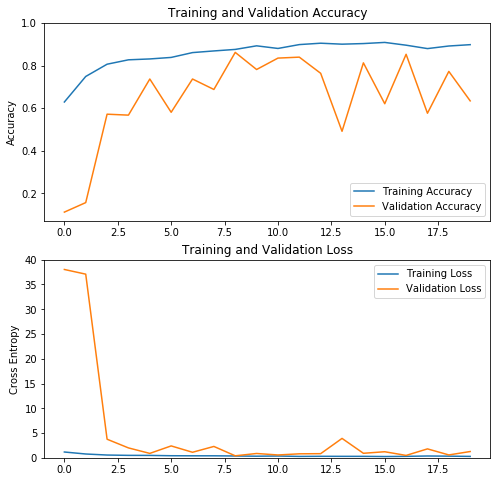

In [0]:
acc = history_fine.history['acc']
val_acc = history_fine.history['val_acc']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()